# Exploratory Data Analysis

## Imports and functions

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [60]:
def preprocess_data(data):
    data = data.drop(data.columns[0], axis=1, inplace=True)

    data['date'] = pd.to_datetime(data['date'])

    # Daily return
    data['daily_return'] = data['close'].pct_change() # pct_change es como el diff()

    # Season info
    data['month'] = data['date'].dt.month
    data['season'] = data['month'] % 12 // 3 + 1
    data['season'] = data['season'].replace({1: 'winter', 2: 'spring', 3: 'summer', 4: 'autumn'})

    data['7_day_m'] = data['close'].rolling(window=7).mean()
    data['30_day_m'] = data['close'].rolling(window=30).mean()

    data['price_std'] = data['close'].rolling(window=30).std()
    
    return data

## Load data

In [2]:
data = pd.read_csv('data/stock_data_v0.csv')
data.drop(data.columns[0], axis=1, inplace=True)
data



,company_code,date,open,high,low,close,adj_close,volume,company_name,market,region,country
0,AD.AS,2008-10-24,8.478576,9.783858,8.471670,9.553649,4.988322,20660367,Ahold,AEX,Europa,Países Bajos
1,AD.AS,2008-10-27,9.231358,9.601993,9.211790,9.290061,4.850694,12366879,Ahold,AEX,Europa,Países Bajos
2,AD.AS,2008-10-28,9.461566,9.503003,9.095535,9.168050,4.786988,8514826,Ahold,AEX,Europa,Países Bajos
3,AD.AS,2008-10-29,9.529477,9.756233,9.384446,9.732061,5.081479,8941004,Ahold,AEX,Europa,Países Bajos
4,AD.AS,2008-10-30,9.927738,10.129170,9.242868,9.497248,4.958874,8456926,Ahold,AEX,Europa,Países Bajos
...,...,...,...,...,...,...,...,...,...,...,...,...
175881,BEKB.BR,2024-01-15,45.680000,45.700001,45.119999,45.119999,45.119999,30511,Bekaert,BelMid,Europa,Bélgica
175882,BEKB.BR,2024-01-16,44.720001,45.139999,44.419998,44.419998,44.419998,31195,Bekaert,BelMid,Europa,Bélgica
175883,BEKB.BR,2024-01-17,44.040001,44.580002,43.680000,44.560001,44.560001,25720,Bekaert,BelMid,Europa,Bélgica
175884,BEKB.BR,2024-01-18,44.779999,44.860001,44.180000,44.860001,44.860001,32069,Bekaert,BelMid,Europa,Bélgica


## Initial data view

In [3]:
# Información general sobre el dataset
data.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175886 entries, 0 to 175885
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   company_code  175886 non-null  object 
 1   date          175886 non-null  object 
 2   open          175886 non-null  float64
 3   high          175886 non-null  float64
 4   low           175886 non-null  float64
 5   close         175886 non-null  float64
 6   adj_close     175886 non-null  float64
 7   volume        175886 non-null  int64  
 8   company_name  175886 non-null  object 
 9   market        175886 non-null  object 
 10  region        175886 non-null  object 
 11  country       175886 non-null  object 
dtypes: float64(5), int64(1), object(6)
memory usage: 16.1+ MB


In [4]:
data["company_name"].unique()

array(['Ahold', 'Aalberts', 'Abn Amro Group Cert.', 'Acciona', 'Acerinox',
       'Acomo', 'Adyen', 'Aedifica', 'Aegon', 'Aena', 'Aex',
       'Agfa-Gevaert', 'Air Liquide', 'Akzo Nobel', 'Alfen', 'Amg',
       'Amgen', 'Aperam', 'Arcadis', 'Arcelorm', 'Asm Int', 'Asm Litho',
       'ASR Nederland NV', 'Atenor', 'Avantium Holding', 'Axa',
       'Azerion Group NV', 'B en S Groep', 'Bam Groep',
       'Banco De Sabadell', 'Barco', 'Basf', 'Basic-Fit NV', 'Be Semicon',
       'Bekaert'], dtype=object)

In [44]:
data.columns

Index(['company_code', 'date', 'open', 'high', 'low', 'close', 'adj_close',
       'volume', 'company_name', 'market', 'region', 'country', 'month',
       'season', 'daily_return', '7_day_m', '30_day_m', 'price_std',
       'avg_volume'],
      dtype='object')

In [45]:
data["region"].unique()

array(['Europa', 'América del Norte'], dtype=object)

In [5]:
# Descripción estadística de las columnas numéricas
data.describe()


,open,high,low,close,adj_close,volume
count,175886.000000,175886.000000,175886.000000,175886.000000,175886.000000,1.758860e+05
mean,64.289016,64.985403,63.556692,64.283907,57.807722,5.320605e+06
std,163.615456,165.775736,161.369568,163.611962,164.040484,1.877508e+07
min,0.000000,0.085938,0.075521,0.075521,-2.514256,0.000000e+00
25%,8.636506,8.751696,8.500000,8.631571,4.958273,9.368825e+04
50%,21.049999,21.295000,20.770000,21.040001,14.384874,5.308970e+05
75%,46.860001,47.409872,46.255001,46.844012,35.747352,3.168576e+06
max,2775.000000,2835.000000,2732.500000,2766.000000,2766.000000,1.025386e+09


### Valores nulos

In [6]:
# Verificar valores nulos
print(data.isnull().sum())


company_code    0
date            0
open            0
high            0
low             0
close           0
adj_close       0
volume          0
company_name    0
market          0
region          0
country         0
dtype: int64


## Data enrichment

In [8]:
data['date'] = pd.to_datetime(data['date'])

### Seasons behaviour

Incluimos las estaciones

In [9]:
data['month'] = data['date'].dt.month
data['season'] = data['month'] % 12 // 3 + 1
data['season'] = data['season'].replace({1: 'winter', 2: 'spring', 3: 'summer', 4: 'autumn'})
data

,company_code,date,open,high,low,close,adj_close,volume,company_name,market,region,country,month,season
0,AD.AS,2008-10-24,8.478576,9.783858,8.471670,9.553649,4.988322,20660367,Ahold,AEX,Europa,Países Bajos,10,autumn
1,AD.AS,2008-10-27,9.231358,9.601993,9.211790,9.290061,4.850694,12366879,Ahold,AEX,Europa,Países Bajos,10,autumn
2,AD.AS,2008-10-28,9.461566,9.503003,9.095535,9.168050,4.786988,8514826,Ahold,AEX,Europa,Países Bajos,10,autumn
3,AD.AS,2008-10-29,9.529477,9.756233,9.384446,9.732061,5.081479,8941004,Ahold,AEX,Europa,Países Bajos,10,autumn
4,AD.AS,2008-10-30,9.927738,10.129170,9.242868,9.497248,4.958874,8456926,Ahold,AEX,Europa,Países Bajos,10,autumn
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175881,BEKB.BR,2024-01-15,45.680000,45.700001,45.119999,45.119999,45.119999,30511,Bekaert,BelMid,Europa,Bélgica,1,winter
175882,BEKB.BR,2024-01-16,44.720001,45.139999,44.419998,44.419998,44.419998,31195,Bekaert,BelMid,Europa,Bélgica,1,winter
175883,BEKB.BR,2024-01-17,44.040001,44.580002,43.680000,44.560001,44.560001,25720,Bekaert,BelMid,Europa,Bélgica,1,winter
175884,BEKB.BR,2024-01-18,44.779999,44.860001,44.180000,44.860001,44.860001,32069,Bekaert,BelMid,Europa,Bélgica,1,winter


### Métricas temporales


#### Retornos diarios

In [46]:
data['daily_return'] = data['close'].pct_change() # pct_change es como el diff()


#### Media movil

In [11]:
data['7_day_m'] = data['close'].rolling(window=7).mean()
data['30_day_m'] = data['close'].rolling(window=30).mean()

data['avg_volume'] = data['volume'].rolling(window=30).mean()

### Volatilidad
La volatilidad puede ser útil para evaluar el riesgo asociado con una acción.

In [12]:
data['price_std'] = data['close'].rolling(window=30).std()


### Volumen promedio
para medir la liquidez de las acciones

In [13]:
data['avg_volume'] = data['volume'].rolling(window=30).mean()

### Plots

In [16]:
data["company_name"].unique()

array(['Ahold', 'Aalberts', 'Abn Amro Group Cert.', 'Acciona', 'Acerinox',
       'Acomo', 'Adyen', 'Aedifica', 'Aegon', 'Aena', 'Aex',
       'Agfa-Gevaert', 'Air Liquide', 'Akzo Nobel', 'Alfen', 'Amg',
       'Amgen', 'Aperam', 'Arcadis', 'Arcelorm', 'Asm Int', 'Asm Litho',
       'ASR Nederland NV', 'Atenor', 'Avantium Holding', 'Axa',
       'Azerion Group NV', 'B en S Groep', 'Bam Groep',
       'Banco De Sabadell', 'Barco', 'Basf', 'Basic-Fit NV', 'Be Semicon',
       'Bekaert'], dtype=object)

In [37]:
df_aux = data[data["company_name"] == "Acerinox"][30:]
df_aux

,company_code,date,open,high,low,close,adj_close,volume,company_name,market,region,country,month,season,daily_return,7_day_m,30_day_m,price_std,avg_volume
16129,ACX.MC,2000-02-14,9.7125,9.7125,9.3750,9.5575,3.648866,2396400,Acerinox,IBEX35,Europa,España,2,winter,-0.000784,9.792857,9.941250,0.323236,4.558559e+06
16130,ACX.MC,2000-02-15,9.3900,10.0500,9.3900,10.0000,3.817804,3350640,Acerinox,IBEX35,Europa,España,2,winter,0.046299,9.823214,9.945417,0.323158,4.589945e+06
16131,ACX.MC,2000-02-16,10.0000,10.0500,9.5500,9.7125,3.708041,3394144,Acerinox,IBEX35,Europa,España,2,winter,-0.028750,9.814286,9.950833,0.317616,4.640788e+06
16132,ACX.MC,2000-02-17,9.8375,9.8375,9.5750,9.5875,3.660317,3185664,Acerinox,IBEX35,Europa,España,2,winter,-0.012870,9.745714,9.952083,0.316054,4.746977e+06
16133,ACX.MC,2000-02-18,9.7450,9.7450,8.7775,9.1150,3.479928,7785168,Acerinox,IBEX35,Europa,España,2,winter,-0.049283,9.629286,9.913417,0.344834,4.817476e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22273,ACX.MC,2024-01-15,10.3650,10.4350,10.3450,10.4000,10.079204,665126,Acerinox,IBEX35,Europa,España,1,winter,0.011673,10.269286,10.353000,0.221346,7.355804e+05
22274,ACX.MC,2024-01-16,10.3750,10.4000,10.0950,10.0950,9.783612,927431,Acerinox,IBEX35,Europa,España,1,winter,-0.029327,10.236429,10.353833,0.220289,7.251239e+05
22275,ACX.MC,2024-01-17,10.0250,10.0250,9.8760,9.9160,9.610134,2084900,Acerinox,IBEX35,Europa,España,1,winter,-0.017732,10.171571,10.343700,0.233267,7.674440e+05
22276,ACX.MC,2024-01-18,9.9700,9.9900,9.8600,9.8960,9.590751,998162,Acerinox,IBEX35,Europa,España,1,winter,-0.002017,10.118143,10.338900,0.241082,7.753753e+05


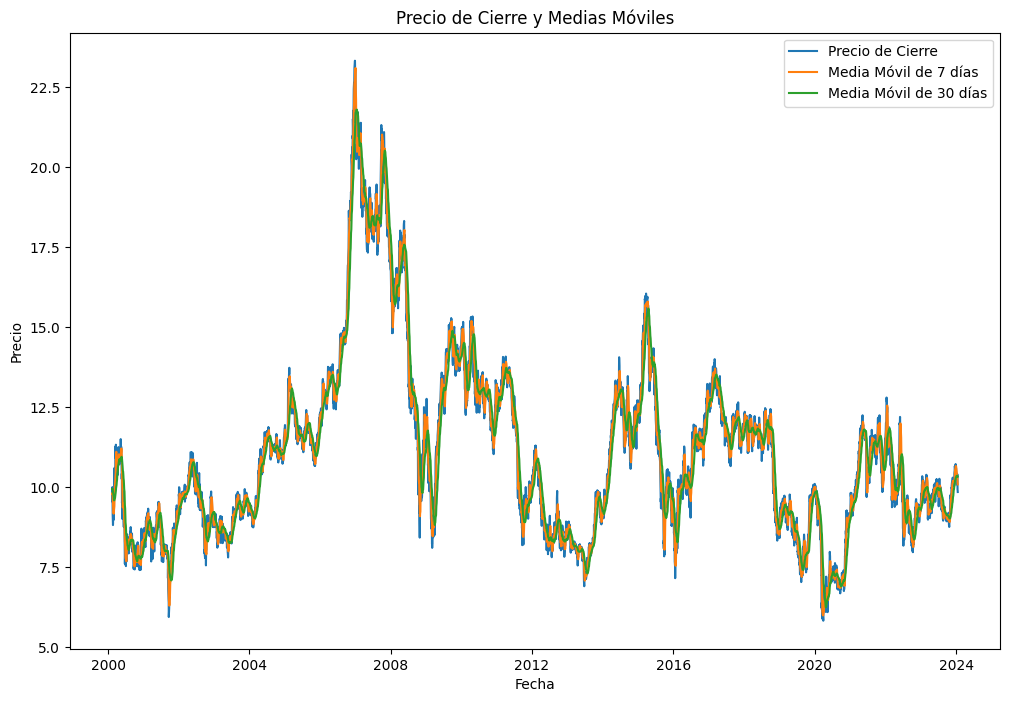

In [38]:

# Visualizando algunas de las nuevas métricas
plt.figure(figsize=(12, 8))
plt.plot(df_aux['date'], df_aux['close'], label='Precio de Cierre')
plt.plot(df_aux['date'], df_aux['7_day_m'], label='Media Móvil de 7 días')
plt.plot(df_aux['date'], df_aux['30_day_m'], label='Media Móvil de 30 días')
plt.title('Precio de Cierre y Medias Móviles')
plt.xlabel('Fecha')
plt.ylabel('Precio')
plt.legend()
plt.show()

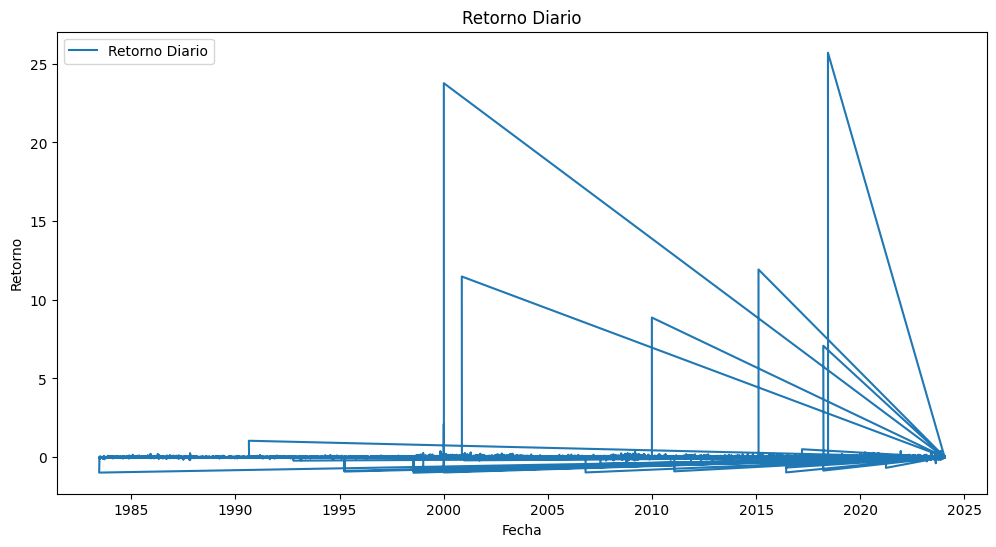

In [39]:


plt.figure(figsize=(12, 6))
plt.plot(data['date'], data['daily_return'], label='Retorno Diario')
plt.title('Retorno Diario')
plt.xlabel('Fecha')
plt.ylabel('Retorno')
plt.legend()
plt.show()



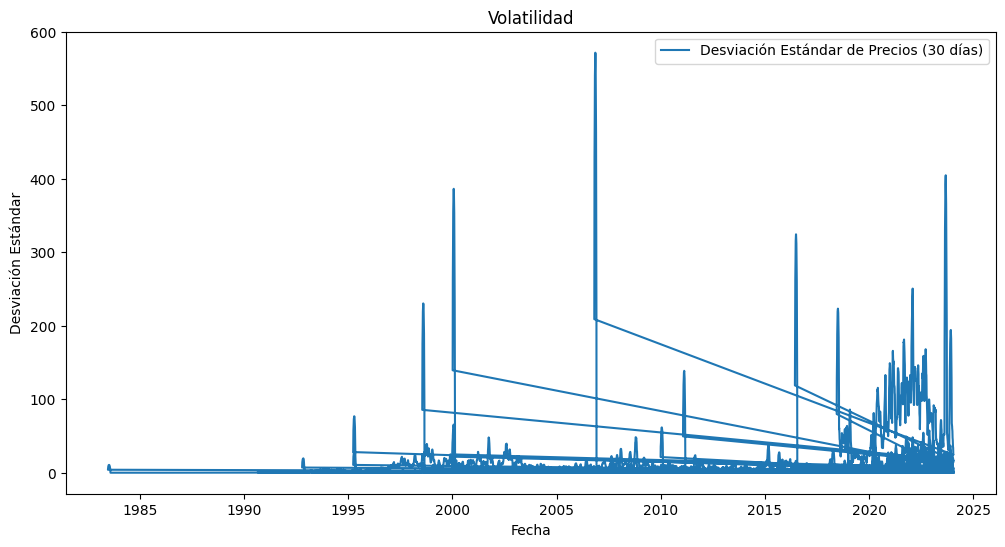

In [30]:
plt.figure(figsize=(12, 6))
plt.plot(data['date'], data['price_std'], label='Desviación Estándar de Precios (30 días)')
plt.title('Volatilidad')
plt.xlabel('Fecha')
plt.ylabel('Desviación Estándar')
plt.legend()
plt.show()

## Serie temporal

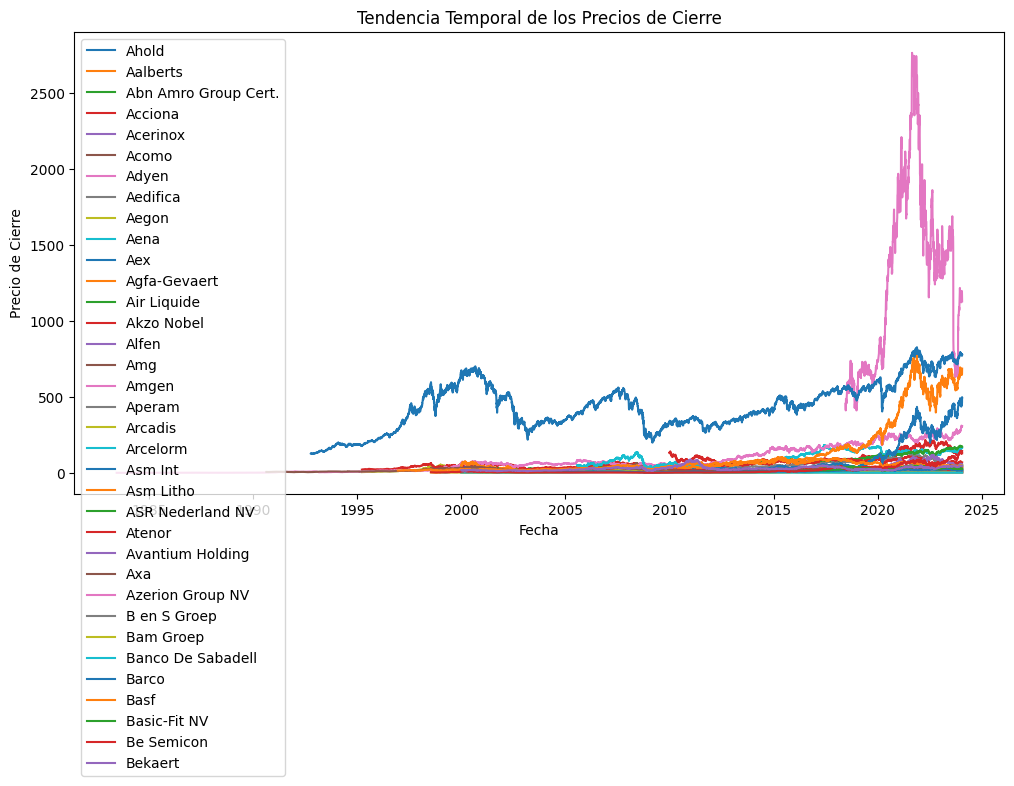

In [31]:

# Análisis de la tendencia temporal de los precios de cierre
plt.figure(figsize=(12, 6))
for company in data['company_name'].unique():
    company_data = data[data['company_name'] == company]
    plt.plot(company_data['date'], company_data['close'], label=company)
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre')
plt.title('Tendencia Temporal de los Precios de Cierre')
plt.legend()
plt.show()


## Comparación de rendimiento entre compañías

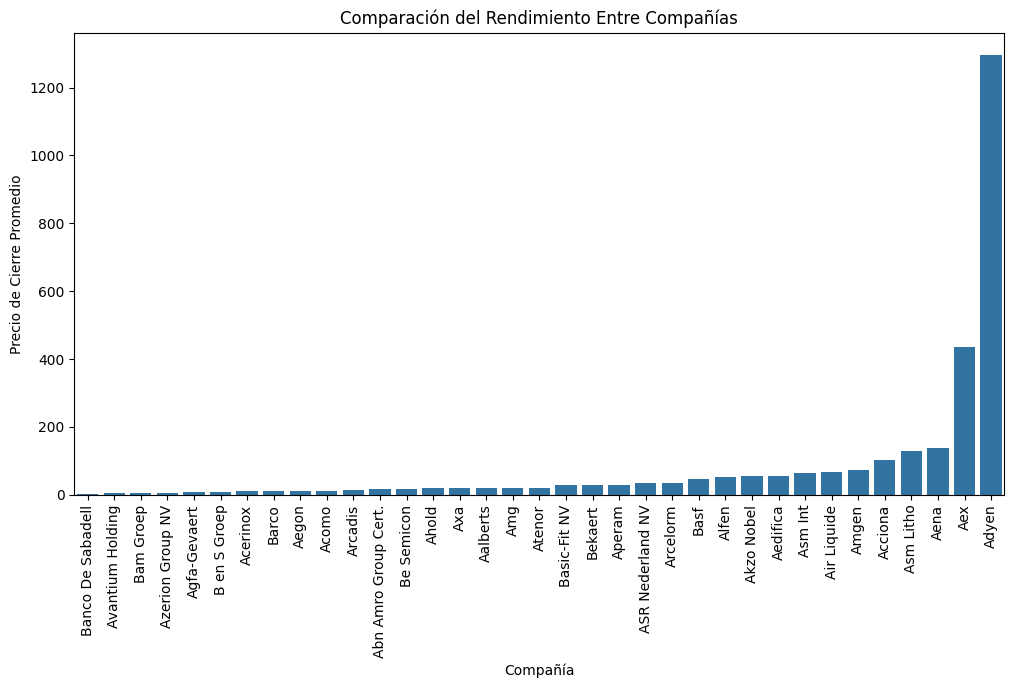

In [32]:
# Promedio del precio de cierre por compañía
company_performance = data.groupby('company_name')['close'].mean().sort_values()

plt.figure(figsize=(12, 6))
sns.barplot(x=company_performance.index, y=company_performance.values)
plt.xlabel('Compañía')
plt.ylabel('Precio de Cierre Promedio')
plt.title('Comparación del Rendimiento Entre Compañías')
plt.xticks(rotation=90)
plt.show()


## Correlaciones

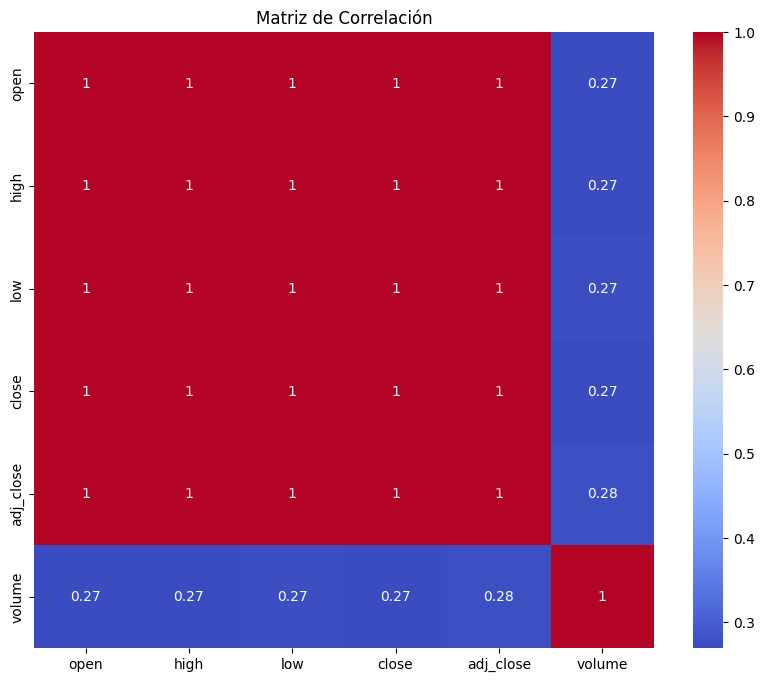

In [33]:
# Matriz de correlación
correlation_matrix = data[['open', 'high', 'low', 'close', 'adj_close', 'volume']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()


## Visualización geográfica

In [47]:
#import plotly.express as px

# Gráfico de dispersión geográfico
#fig = px.scatter_geo(data, locations="country", locationmode='country names',
#                     hover_name="company_name", size="volume",
#                     projection="natural earth")
#fig.show()


## Por mercado

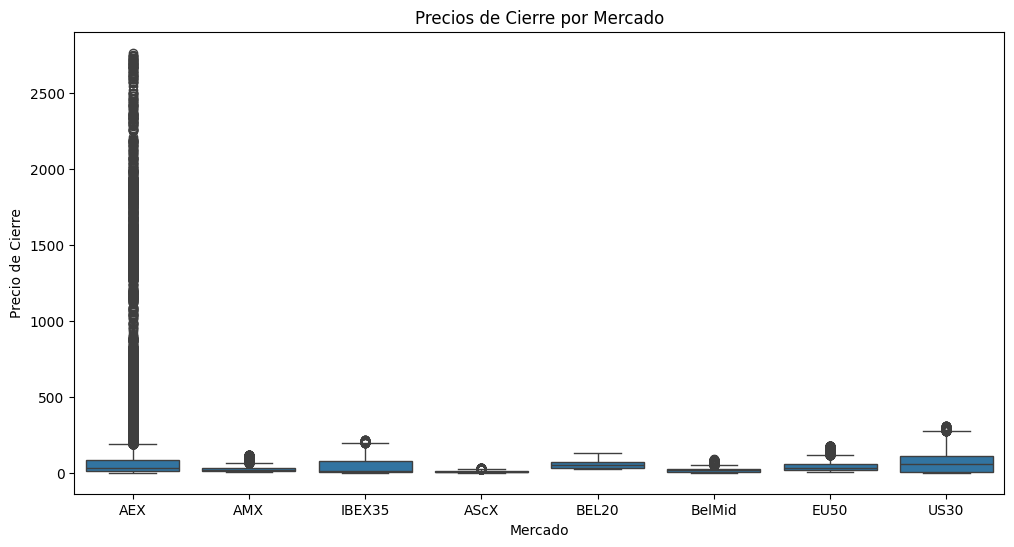

In [48]:
# Análisis de precios por mercado
plt.figure(figsize=(12, 6))
sns.boxplot(x='market', y='close', data=data)
plt.xlabel('Mercado')
plt.ylabel('Precio de Cierre')
plt.title('Precios de Cierre por Mercado')
plt.show()



## Por región

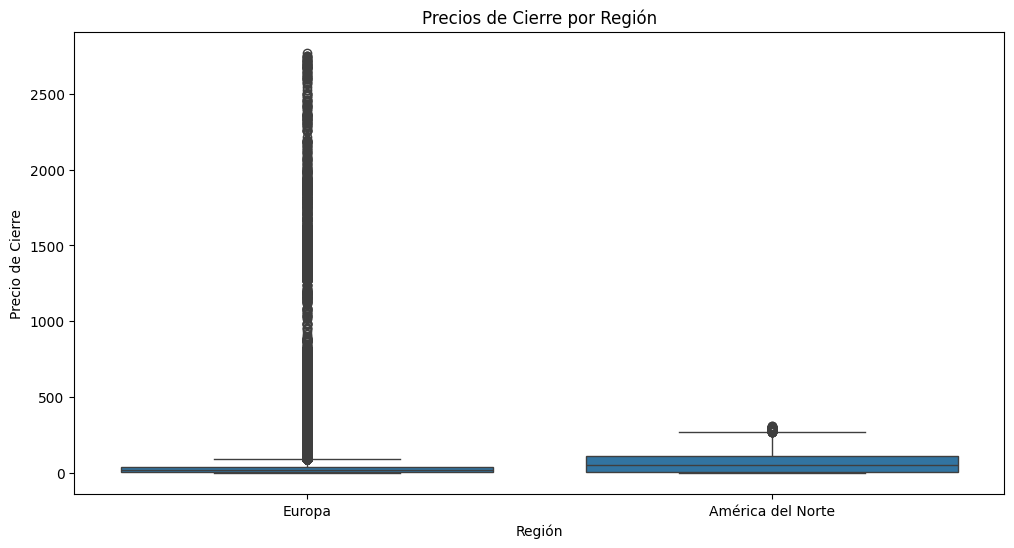

In [49]:
# Análisis de precios por región
plt.figure(figsize=(12, 6))
sns.boxplot(x='region', y='close', data=data)
plt.xlabel('Región')
plt.ylabel('Precio de Cierre')
plt.title('Precios de Cierre por Región')
plt.show()


## ganancias por empresas ordenadas

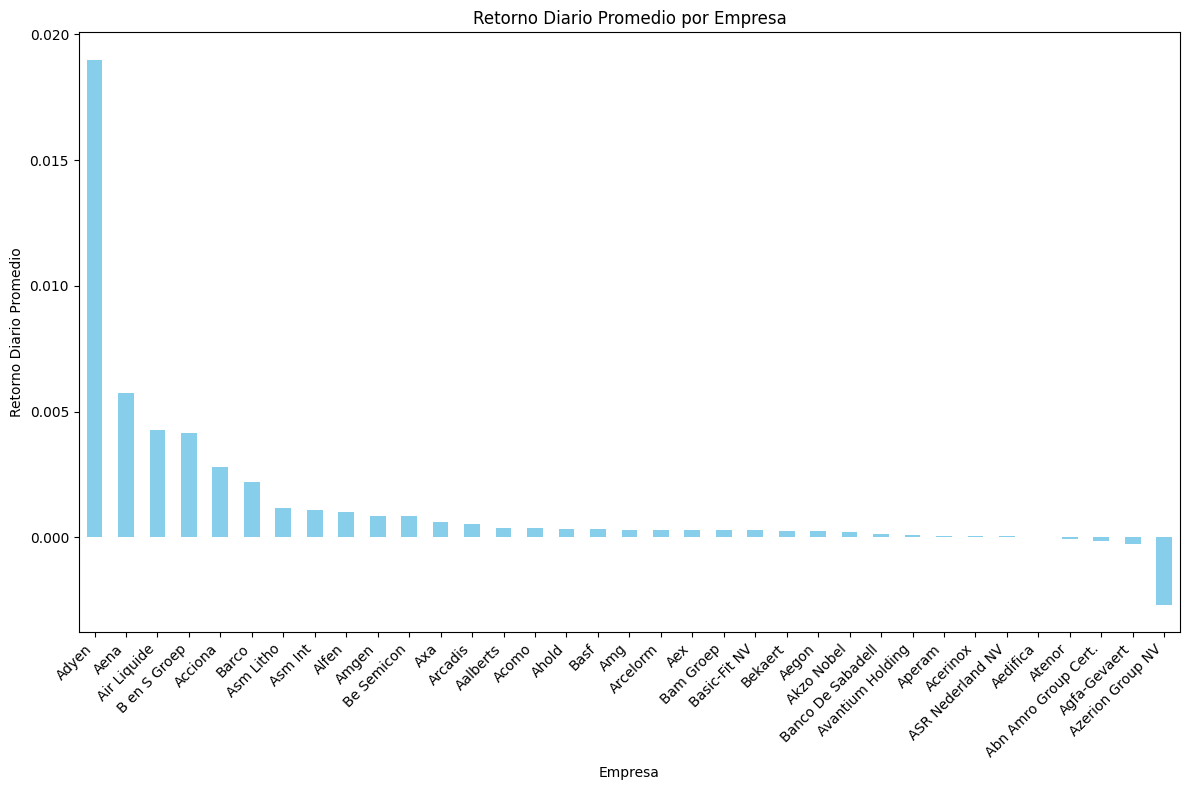

In [50]:

# 2. Agrupar por empresa y calcular el retorno promedio diario
mean_daily_return = data.groupby('company_name')['daily_return'].mean()

# 3. Ordenar las empresas según el retorno diario promedio
mean_daily_return_sorted = mean_daily_return.sort_values(ascending=False)

# 4. Visualizar las empresas ordenadas por retorno diario promedio
plt.figure(figsize=(12, 8))
mean_daily_return_sorted.plot(kind='bar', color='skyblue')
plt.title('Retorno Diario Promedio por Empresa')
plt.xlabel('Empresa')
plt.ylabel('Retorno Diario Promedio')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Ganancias por región

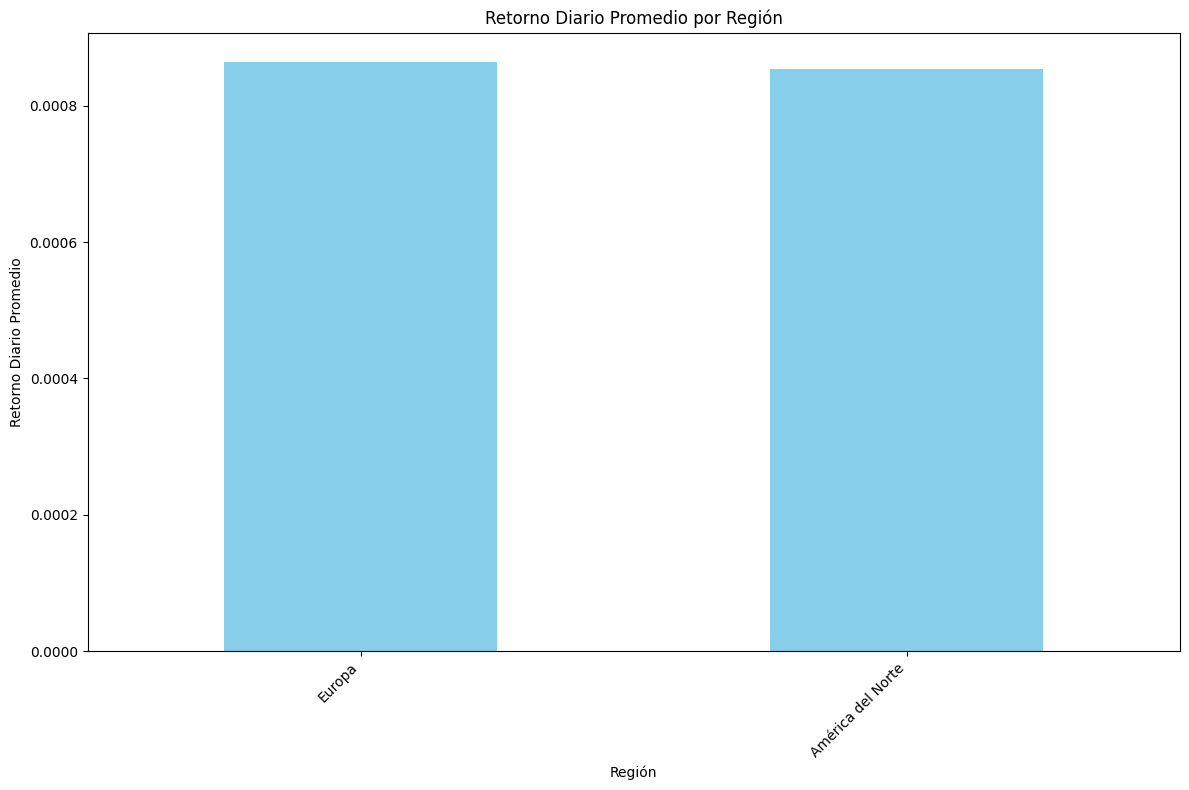

In [51]:

# 2. Agrupar por región y calcular el retorno promedio diario
mean_daily_return_by_region = data.groupby('region')['daily_return'].mean()

# 3. Ordenar las regiones según el retorno diario promedio
mean_daily_return_by_region_sorted = mean_daily_return_by_region.sort_values(ascending=False)

# 4. Visualizar las regiones ordenadas por retorno diario promedio
plt.figure(figsize=(12, 8))
mean_daily_return_by_region_sorted.plot(kind='bar', color='skyblue')
plt.title('Retorno Diario Promedio por Región')
plt.xlabel('Región')
plt.ylabel('Retorno Diario Promedio')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Ganancias por estacion

In [57]:
mean_daily_return_by_season

season
autumn    0.000532
spring    0.000583
summer    0.000516
winter    0.001855
Name: daily_return, dtype: float64

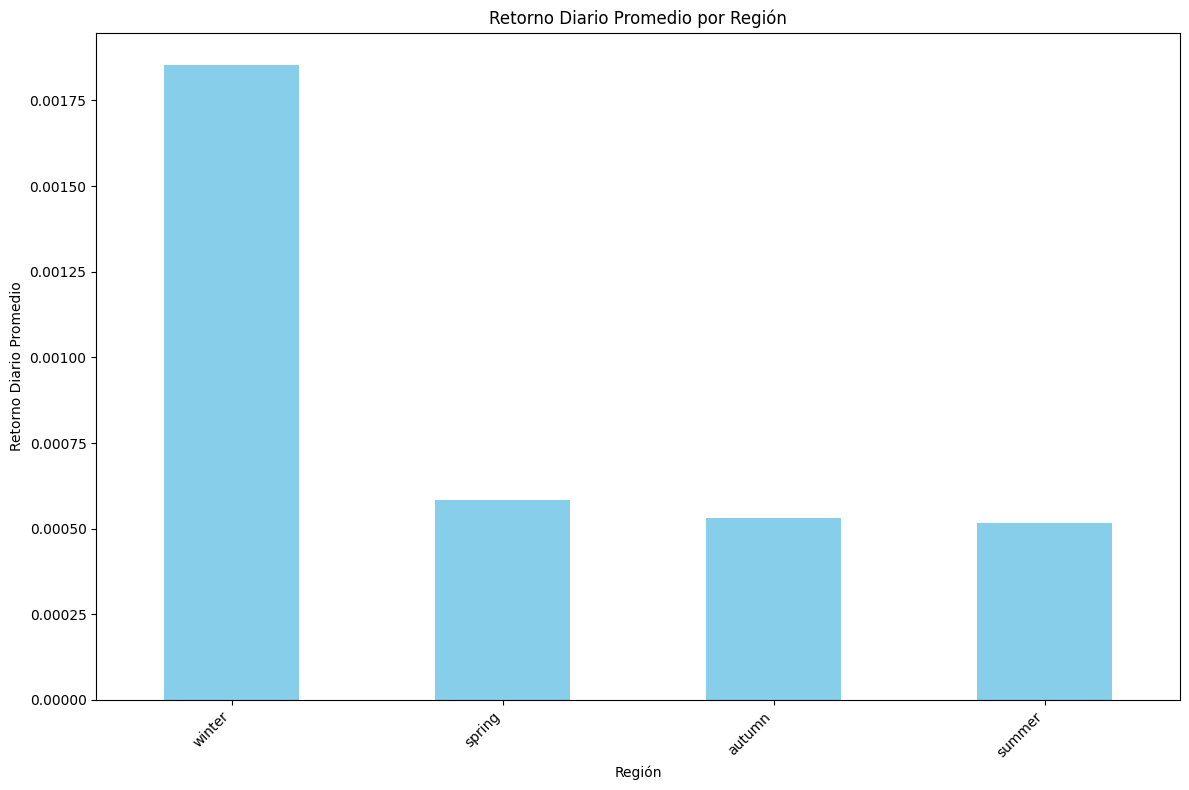

In [59]:

# 2. Agrupar por región y calcular el retorno promedio diario
mean_daily_return_by_season = data.groupby('season')['daily_return'].mean()

# 3. Ordenar las regiones según el retorno diario promedio
mean_daily_return_by_season_sorted = mean_daily_return_by_season.sort_values(ascending=False)

# 4. Visualizar las regiones ordenadas por retorno diario promedio
plt.figure(figsize=(12, 8))
mean_daily_return_by_season_sorted.plot(kind='bar', color='skyblue')
plt.title('Retorno Diario Promedio por Región')
plt.xlabel('Región')
plt.ylabel('Retorno Diario Promedio')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Ganancias por pais

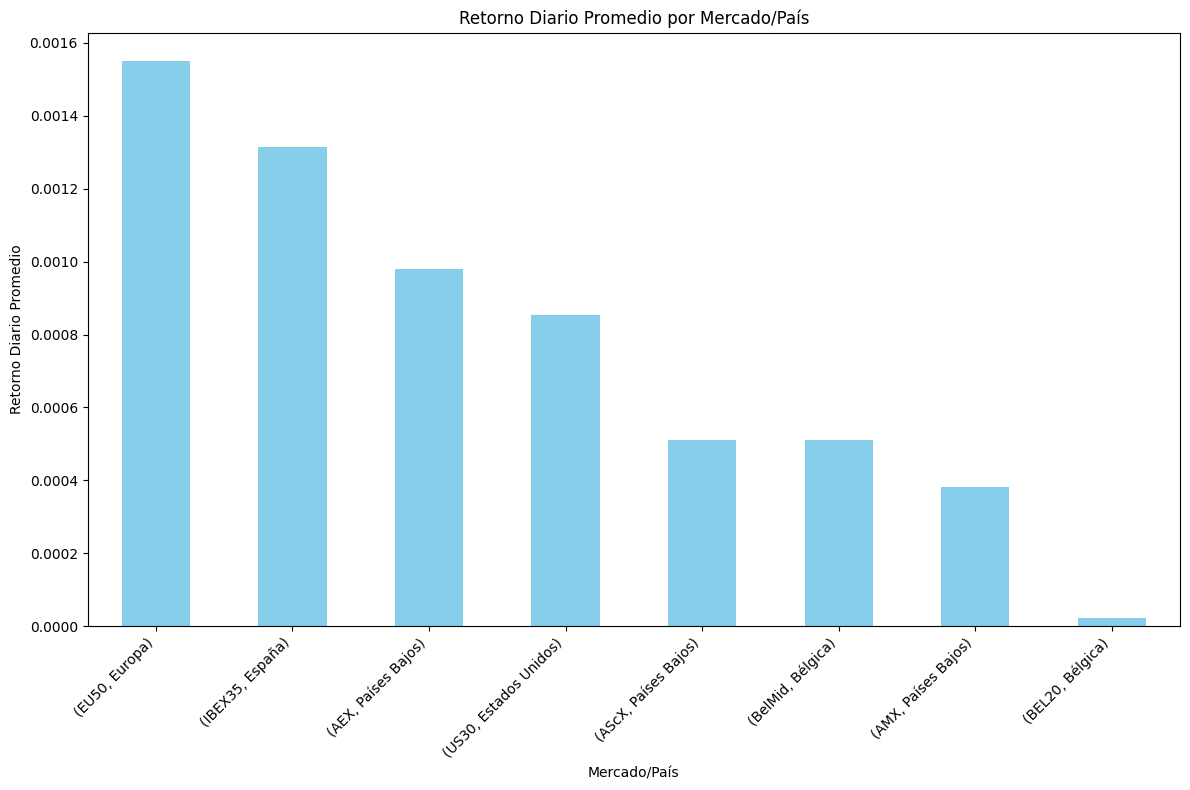

In [53]:

# 2. Agrupar por mercado/país y calcular el retorno promedio diario
mean_daily_return_by_market_country = data.groupby(['market', 'country'])['daily_return'].mean()

# 3. Ordenar los mercados/países según el retorno diario promedio
mean_daily_return_by_market_country_sorted = mean_daily_return_by_market_country.sort_values(ascending=False)

# 4. Visualizar los mercados/países ordenados por retorno diario promedio
plt.figure(figsize=(12, 8))
mean_daily_return_by_market_country_sorted.plot(kind='bar', color='skyblue')
plt.title('Retorno Diario Promedio por Mercado/País')
plt.xlabel('Mercado/País')
plt.ylabel('Retorno Diario Promedio')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Datos extra
S&P500

In [62]:
data["company_name"].unique()

array(['Ahold', 'Aalberts', 'Abn Amro Group Cert.', 'Acciona', 'Acerinox',
       'Acomo', 'Adyen', 'Aedifica', 'Aegon', 'Aena', 'Aex',
       'Agfa-Gevaert', 'Air Liquide', 'Akzo Nobel', 'Alfen', 'Amg',
       'Amgen', 'Aperam', 'Arcadis', 'Arcelorm', 'Asm Int', 'Asm Litho',
       'ASR Nederland NV', 'Atenor', 'Avantium Holding', 'Axa',
       'Azerion Group NV', 'B en S Groep', 'Bam Groep',
       'Banco De Sabadell', 'Barco', 'Basf', 'Basic-Fit NV', 'Be Semicon',
       'Bekaert'], dtype=object)